In [1]:
from main import *

In [2]:
machines = ["M01" ,"M02"]#,"M03"]
process_names = ["OP00","OP01"]#,"OP02","OP03","OP04","OP05","OP06","OP07","OP08","OP09","OP10","OP11","OP12","OP13","OP14"]
labels = ["good","bad"]
path_to_dataset = Path("./data/").absolute()

In [3]:
X_data = []
y_data = []

for process_name, machine, label in itertools.product(process_names, machines, labels):
    data_path = os.path.join(path_to_dataset, machine, process_name, label)
    data_list, data_label = data_loader_utils.load_tool_research_data(data_path, label=label, add_additional_label = True, verbose = False)
    #concatenating
    X_data.extend(data_list)
    y_data.extend(data_label)

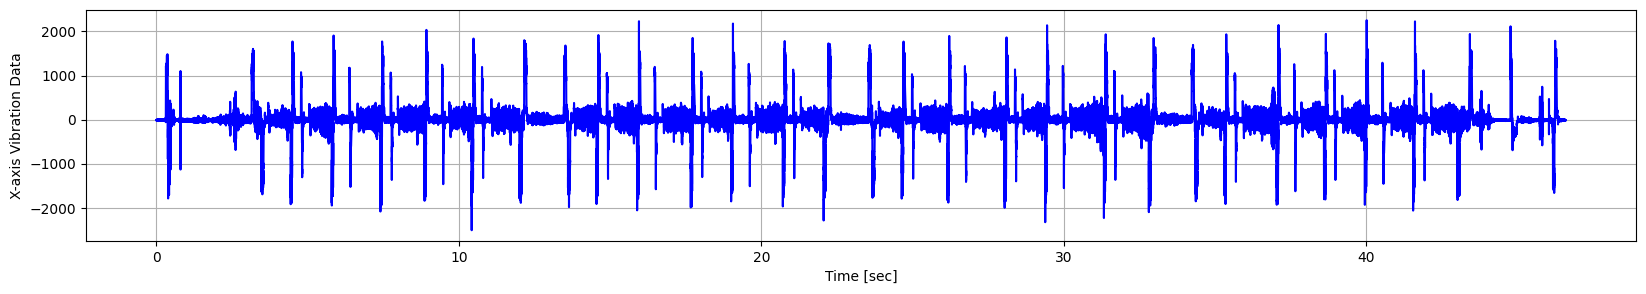

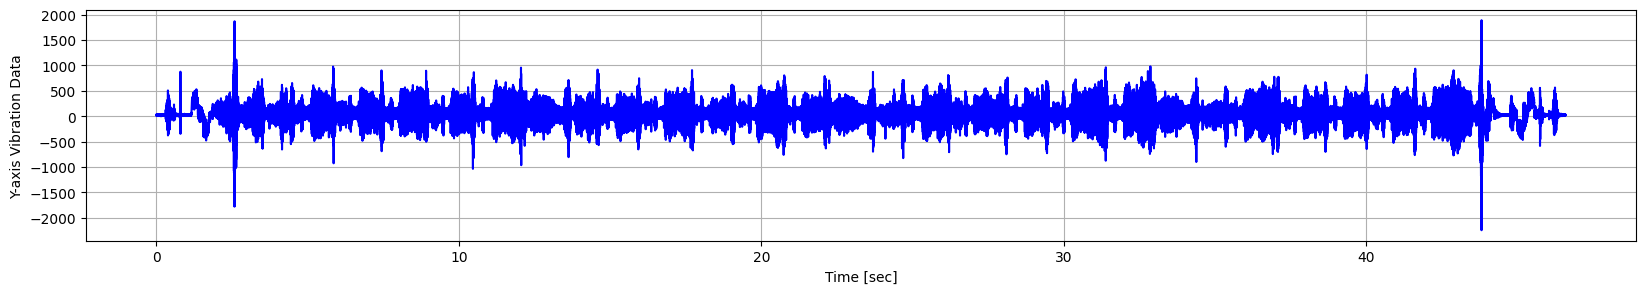

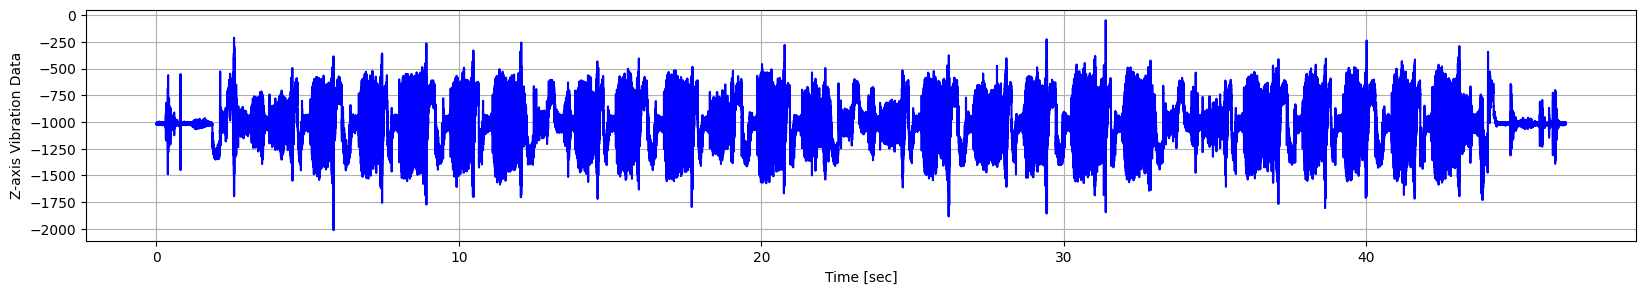

In [4]:
file = Path("./data/M01/OP02/good/M01_Aug_2019_OP02_000.h5").absolute()
sample = data_loader_utils.datafile_read(file)

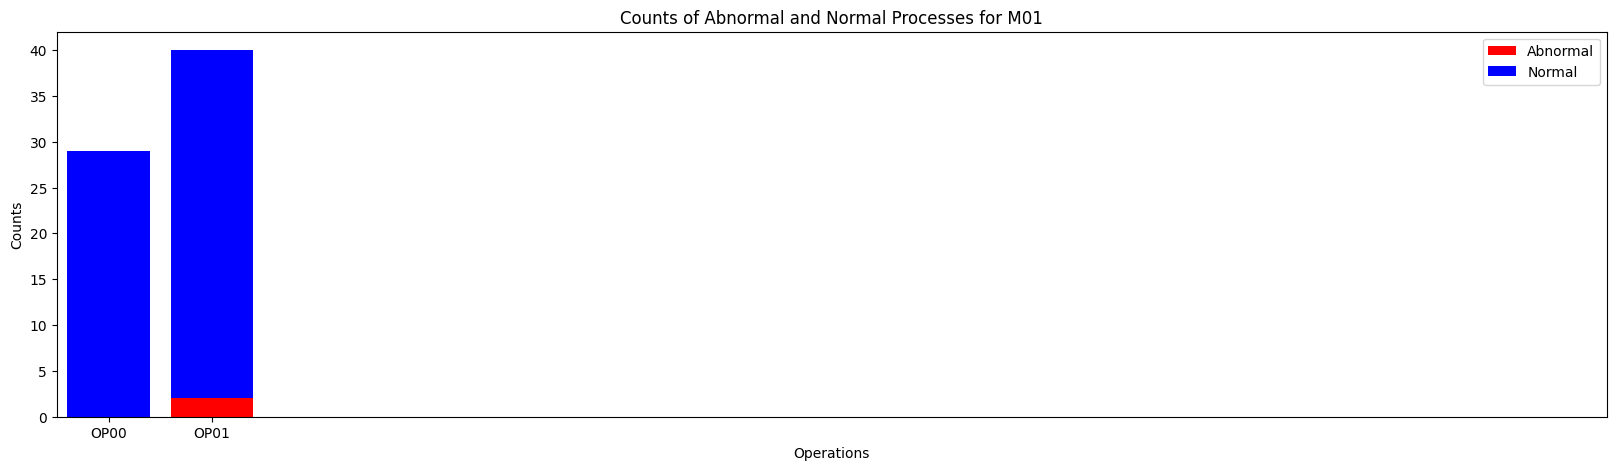

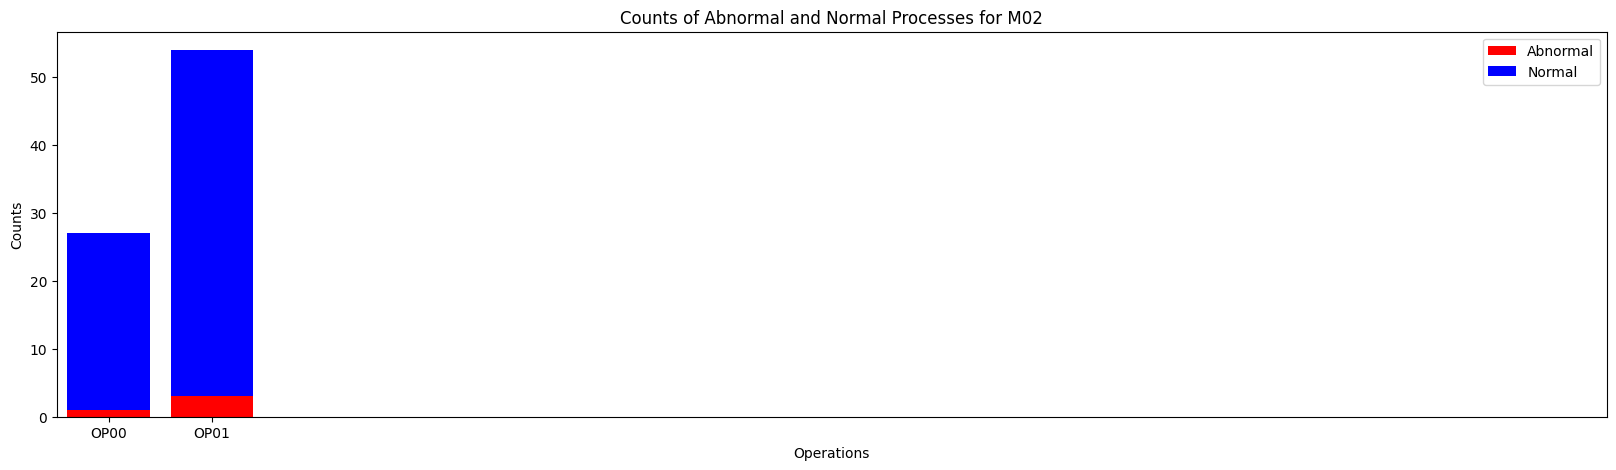

In [5]:
X, y, features = preprocess_data(X_data, y_data)
y = np.array(y)
features = np.array(features)
plot_class_dist(y, features)

In [6]:
rawsample = X_data[0] # sample is one single example of length 93184 with three dimensions
from sklearn.preprocessing import normalize
sample = normalize(rawsample)

In [7]:
X_data[-1].shape

(46511, 3)

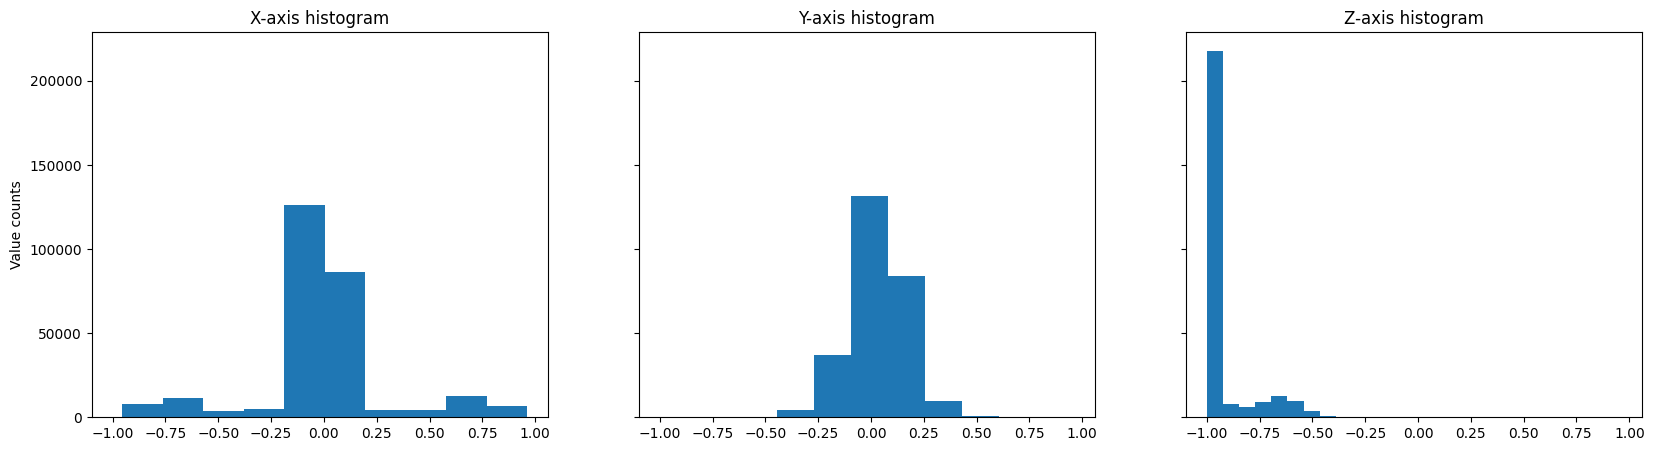

In [8]:
fig, ax = plt.subplots(1,3, figsize = (20,5), sharex = True, sharey = True)
ax[0].hist(sample[:,0])
ax[0].set_title("X-axis histogram")
ax[1].hist(sample[:,1])
ax[1].set_title("Y-axis histogram")
ax[2].hist(sample[:,2])
ax[2].set_title("Z-axis histogram")
ax[0].set_ylabel("Value counts")
plt.show()

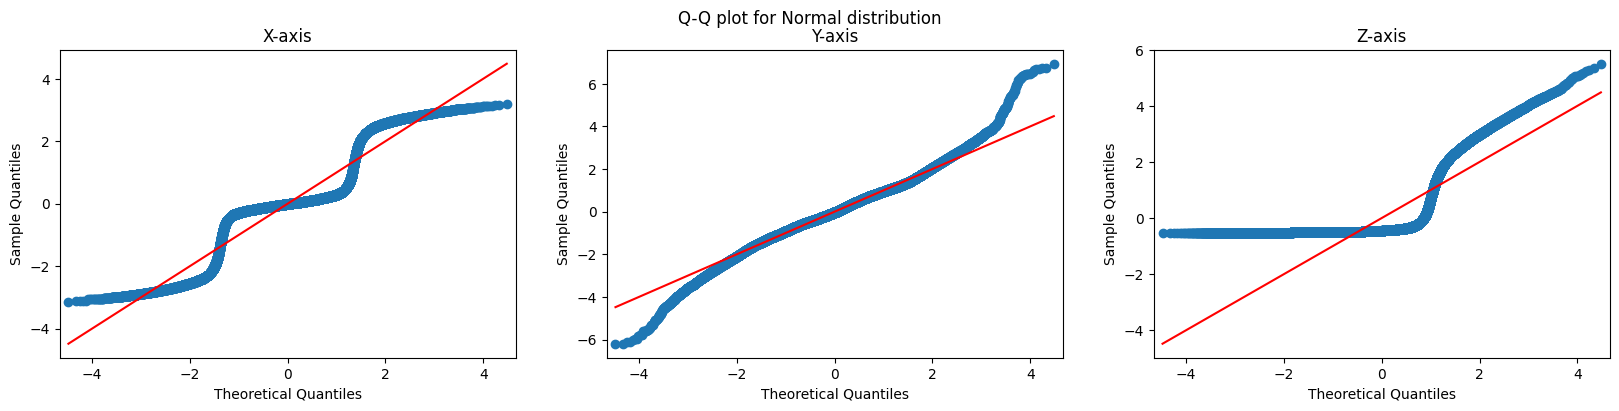

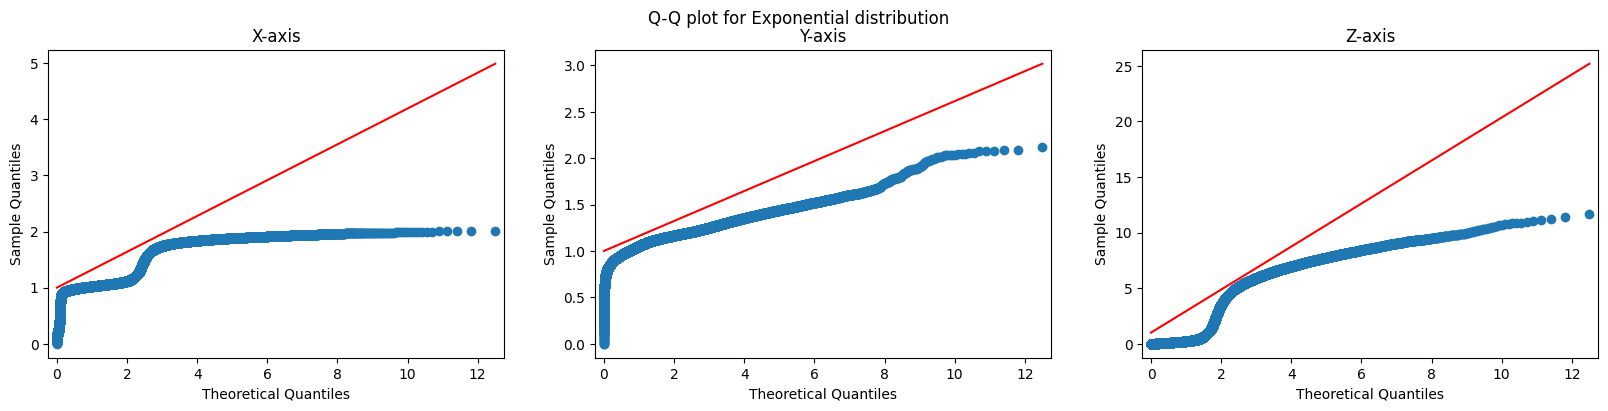

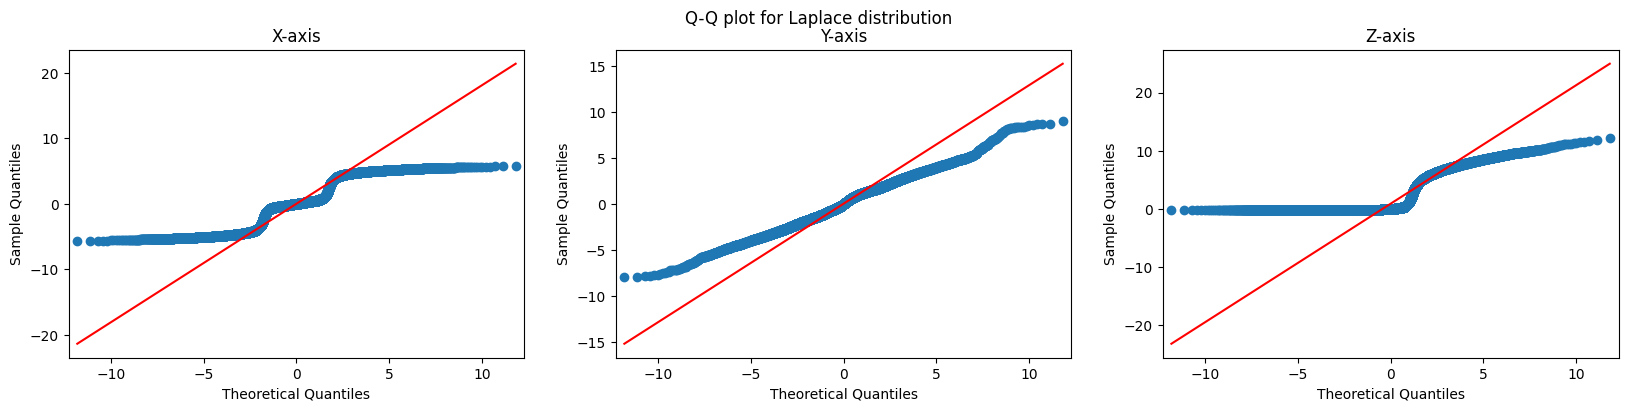

In [9]:
distributions = {"Normal": stats.norm, "Exponential": stats.expon, "Laplace": stats.laplace}
qqplot(sample, distributions) 

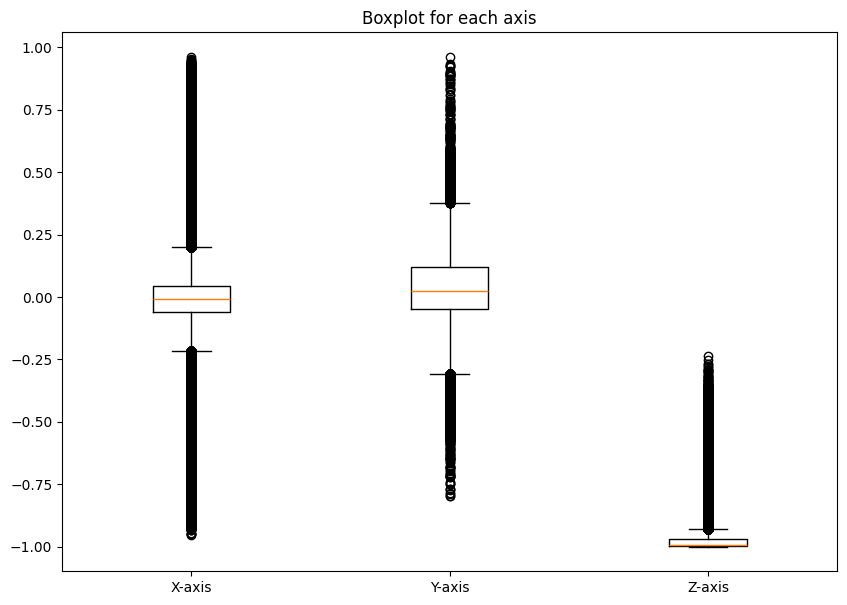

In [10]:
samp = sample[:, 0]
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
ax.boxplot(sample)
ax.set_xticklabels(["X-axis", "Y-axis", "Z-axis"])
ax.set_title("Boxplot for each axis")
plt.show()

In [11]:
a, true = np.where([features[:, 0] == "M01"])
b = [X[i] for i in true]

In [36]:
for machine in np.unique(features[:, 0]):
    for operation in np.unique(features[:, 3]):
        index = np.where((features[:, 0] == machine) & (features[:, 3] == operation))[0]
        X_indexed = [X[i] for i in index]
        print(X_indexed[0].shape)

(268288, 3)
(60416, 3)
(268288, 3)
(54272, 3)
